In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

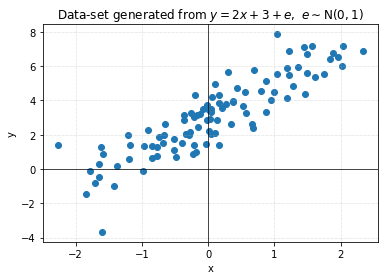

In [395]:
np.random.seed(20210219)
x= np.random.randn(100)
X= x[:, np.newaxis]
noise= np.random.randn(100)
y= 2*x + 3 + noise
ax= plt.axes()
ax.scatter(x, y)
ax.set(xlabel= 'x', ylabel= 'y', title= r"Data-set generated from $y= 2x + 3 + e, ~ e \sim \mathrm{N}(0, 1)$")
ax.axvline(0, c= 'k', linewidth= 0.7)
ax.axhline(0, c= 'k', linewidth= 0.7)
plt.grid(True, lw= 0.5, ls= ':');

In [279]:
# method 1
model1= LinearRegression(fit_intercept= True)
model1.fit(X, y)

beta10= model1.intercept_
beta11= model1.coef_[0]
print("Linear regression model")
print("="*23)
print("y = {} + ({})x".format(round(beta10, 2), round(beta11, 2)))
print("R2: {:.3f}".format(model1.score(X, y)))

Linear regression model
y = 3.01 + (1.86)x
R2: 0.761


In [280]:
# method 2
X2= sm.add_constant(X)
model2= sm.OLS(y, X2).fit()
beta20= model2.params[0]
beta21= model2.params[1]
print("Ordinary Least Squares model")
print("="*33)
print("y = {} + ({})x".format(round(beta10, 2), round(beta11, 2)))
print("R2: {:.3f}\n\n".format(model2.rsquared))
print(model2.summary())

Ordinary Least Squares model
y = 3.01 + (1.86)x
R2: 0.761


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           3.14e-32
Time:                        17:31:40   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

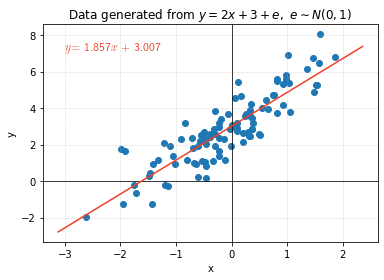

In [281]:
# predict couple of points
xfit= np.array([min(x)-0.5, max(x)+0.5])
Xfit= xfit[:, np.newaxis]
yfit= model1.predict(Xfit)

# plot data and regression model
ax= plt.axes()
ax.scatter(x, y)
ax.set(
  xlabel= "x", ylabel= "y",
  title= r"Data generated from $y = 2x + 3 + e, ~ e\sim N(0, 1)$"
)
ax.axvline(0, c= 'k', lw= 0.75)
ax.axhline(0, c= 'k', lw= 0.75)
ax.plot(xfit, yfit, c= "xkcd:tomato");
plt.text(
  -3, 7, "$y$= {:.3f}$x$ + {:.3f}".format(beta11, beta10),
  ha= "left", va= "bottom",
  c= 'xkcd:tomato', size= 12, weight= 'bold',
  usetex= True
)
plt.grid(True, lw= 0.5, ls= ':');

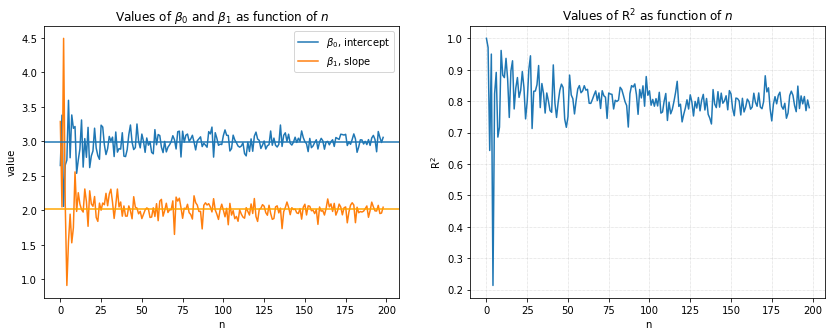

In [394]:
# study effect of N on estimates of parameters and on R2 of linear regression
N= 200
beta0= []
beta1= []
r2= []
np.random.seed(20210219)
for nn in range(2, N+1):
  x= np.random.randn(nn)
  X= x[:, np.newaxis]
  noise= np.random.randn(nn)
  y= 2*x + 3 + noise
  model= LinearRegression(fit_intercept= True).fit(X, y)
  beta0.append(model.intercept_)
  beta1.append(model.coef_[0])
  r2.append(model.score(X, y))

beta0= np.array(beta0)
beta1= np.array(beta1)
r2= np.array(r2)

#ax= plt.axes()
fig, ax = plt.subplots(1, 2, figsize= (14, 5))
line0, = ax[0].plot(beta0)
line1, = ax[0].plot(beta1)
ax[0].axhline(np.mean(beta0))
ax[0].axhline(np.mean(beta1), c= 'orange');
ax[0].set(
  xlabel= "n", ylabel= "value",
  title= r"Values of $\beta_0$ and $\beta_1$ as function of $n$"
)
ax[0].legend((line0, line1), (r"$\beta_0$, intercept", r"$\beta_1$, slope"));

ax[1].plot(r2);
ax[1].set(
  xlabel= "n", ylabel= r"R$^2$",
  title= r"Values of R$^2$ as function of $n$"
)
ax[1].grid(lw= 0.5, ls= ":")

In [302]:
# study effect of noise dispersion on parameters of linear regression
sig_lim= 10
N= 100
n= 20
np.random.seed(20210219)
x= np.random.randn(N)
X= x[:, np.newaxis]
s0= np.random.randn(N)
sigs= np.linspace(1, sig_lim, num= n)
Sigs= sigs[:, np.newaxis]
noise= s0*Sigs
Y= 2*x + 3 + noise # (20, 100) = (n, N)

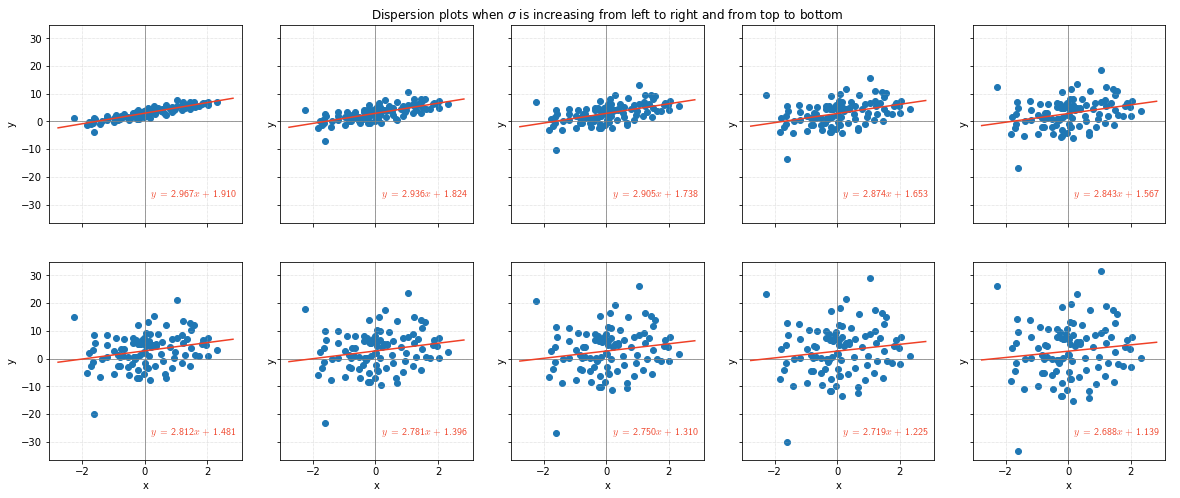

In [375]:
# plot some functions
fig, ax = plt.subplots(
  2, 5,
  sharex= True, sharey= True,
  figsize= (20, 8)
)

for (i, y) in enumerate(Y[::2]):
  model= LinearRegression(fit_intercept= True).fit(X, y)
  xfit= np.array([min(x)-0.5, max(x)+0.5])
  Xfit= xfit[:, np.newaxis]
  yfit= model.predict(Xfit)
  j= i if i < 5 else i - 5
  k= 0 if i < 5 else 1
  ax[k, j].axvline(0, c= 'gray', lw= 0.75)
  ax[k, j].axhline(0, c= 'gray', lw= 0.75)
  ax[k, j].grid(lw= 0.5, ls= ':')
  ax[k, j].scatter(x, y)
  ax[k, j].plot(xfit, yfit, c= "xkcd:tomato")
  ax[k, j].text(
    0.2, -28, "$y$ = {:.3f}$x$ + {:.3f}".format(model.intercept_, model.coef_[0]),
    ha= 'left', va= 'bottom',
    c= "xkcd:tomato", size= 10, weight= 'bold',
    usetex= True
  )
  if k == 0:
    ax[k, j].set(ylabel= "y")
  else:
    ax[k, j].set(xlabel= "x", ylabel= "y")

fig.add_subplot(111, frameon= False)
plt.tick_params(labelcolor= 'none', top= False, bottom= False, left= False, right= False)
plt.title(r"Dispersion plots when $\sigma$ is increasing from left to right and from top to bottom");

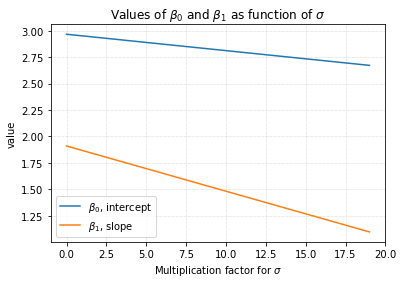

In [303]:
# plot coefficients
betas= np.zeros((n, 2))

for (i, y) in enumerate(Y):
  model= LinearRegression(fit_intercept= True).fit(X, y)
  betas[i, 0]= model.intercept_ # intercept
  betas[i, 1]= model.coef_[0] # slope

ax= plt.axes()
line0, = ax.plot(betas[:, 0])
line1, = ax.plot(betas[:, 1])
plt.xlim(-1, 20)
ax.set(
  xlabel= r"Multiplication factor for $\sigma$", ylabel= "value",
  title= r"Values of $\beta_0$ and $\beta_1$ as function of $\sigma$"
)
ax.legend((line0, line1), (r"$\beta_0$, intercept", r"$\beta_1$, slope"));
plt.grid(True, lw= 0.5, ls= ':')

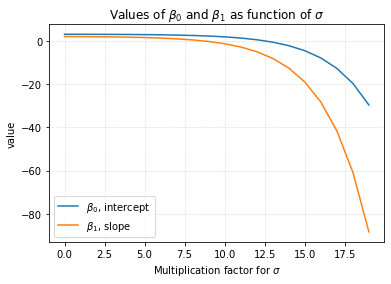

In [376]:
sigs= np.logspace(0, 3, base= 10, num= n)
Sigs= sigs[:, np.newaxis]
noise= s0*Sigs
Y= 2*x + 3 + noise # (20, 100) = (n, N)

betas= np.zeros((n, 2))

for (i, y) in enumerate(Y):
  model= LinearRegression(fit_intercept= True).fit(X, y)
  betas[i, 0]= model.intercept_ # intercept
  betas[i, 1]= model.coef_[0] # slope

ax= plt.axes()
line0, = ax.plot(betas[:, 0])
line1, = ax.plot(betas[:, 1])
ax.set(
  xlabel= r"Multiplication factor for $\sigma$", ylabel= "value",
  title= r"Values of $\beta_0$ and $\beta_1$ as function of $\sigma$"
)
ax.legend((line0, line1), (r"$\beta_0$, intercept", r"$\beta_1$, slope"));
plt.grid(True, lw= 0.5, ls= ':')

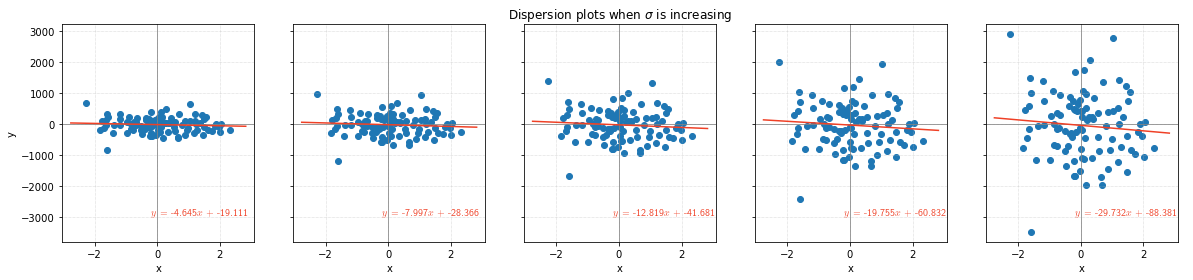

In [390]:
# plot some functions
kk= 5
fig, ax = plt.subplots(1, kk, sharey= True, figsize= (4*kk, 4))

for (i, y) in enumerate(Y[-kk:]):
  model= LinearRegression(fit_intercept= True).fit(X, y)
  xfit= np.array([min(x)-0.5, max(x)+0.5])
  Xfit= xfit[:, np.newaxis]
  yfit= model.predict(Xfit)
  ax[i].axvline(0, c= 'gray', lw= 0.75)
  ax[i].axhline(0, c= 'gray', lw= 0.75)
  ax[i].grid(lw= 0.5, ls= ':')
  ax[i].scatter(x, y)
  ax[i].plot(xfit, yfit, c= "xkcd:tomato")
  ax[i].text(
    -0.2, -3000, "$y$ = {:.3f}$x$ + {:.3f}".format(model.intercept_, model.coef_[0]),
    ha= 'left', va= 'bottom',
    c= "xkcd:tomato", size= 10, weight= 'bold',
    usetex= True
  )
  if i == 0:
    ax[i].set(xlabel= "x", ylabel= "y")
  else:
    ax[i].set(xlabel= "x")

fig.add_subplot(111, frameon= False)
plt.tick_params(labelcolor= 'none', top= False, bottom= False, left= False, right= False)
plt.title(r"Dispersion plots when $\sigma$ is increasing");